In [65]:
data = [[379.74,383.93,384.24,377.48,379.94,384.62,389.30],
        [64.64,65.43,64.95,63.64,63.59,63.61,63.73],
        [1165.24,1198.62,1185.90,1154.23,1162.27,1172.87,1188.68],
        [71.15,73.65,72.82,71.01,71.84,71.65,72.64]]

In [69]:
prices = DataFrame(data,index=['AAPL','JNJ','SPX','XOM'],columns=pd.period_range('2011-9-6',periods=len(data[0]))).T

In [70]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.24,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-10,379.94,63.59,1162.27,71.84
2011-09-11,384.62,63.61,1172.87,71.65
2011-09-12,389.30,63.73,1188.68,72.64


In [131]:
data_v = {'2011-9-6':[18173500,15848300,25416300],
         '2011-9-7':[12492000,10759700,23108400],
         '2011-9-8':[14839800,15551500,22434800],
         '2011-9-9':[20171900,17008200,27969100],
         '2011-9-12':[16697300,13448200,26205800]}

In [132]:
volume = DataFrame(data_v,index=['AAPL','JNJ','XOM']).T

In [133]:
volume.index = pd.to_datetime(volume.index)

In [134]:
volume = volume.to_period('D')

In [139]:
volume.index
prices.index

PeriodIndex(['2011-09-06', '2011-09-07', '2011-09-08', '2011-09-09',
             '2011-09-12'],
            dtype='period[D]', freq='D')

PeriodIndex(['2011-09-06', '2011-09-07', '2011-09-08', '2011-09-09',
             '2011-09-10', '2011-09-11', '2011-09-12'],
            dtype='period[D]', freq='D')

In [140]:
volume.asfreq('B').index

PeriodIndex(['2011-09-06', '2011-09-07', '2011-09-08', '2011-09-09',
             '2011-09-12'],
            dtype='period[B]', freq='B')

In [136]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.702045e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-10,NaN,NaN,NaN,NaN
2011-09-11,NaN,NaN,NaN,NaN
2011-09-12,6.500259e+09,8.570538e+08,NaN,1.903589e+09


In [141]:
vwap = (prices * volume).sum()/volume.sum()

In [142]:
vwap

AAPL    382.570467
JNJ      64.420696
SPX            NaN
XOM      72.191825
dtype: float64

In [143]:
volume.sum()

AAPL     82374500
JNJ      72615900
XOM     125134400
dtype: int64

In [144]:
prices.align(volume)

(              AAPL    JNJ      SPX    XOM
 2011-09-06  379.74  64.64  1165.24  71.15
 2011-09-07  383.93  65.43  1198.62  73.65
 2011-09-08  384.24  64.95  1185.90  72.82
 2011-09-09  377.48  63.64  1154.23  71.01
 2011-09-10  379.94  63.59  1162.27  71.84
 2011-09-11  384.62  63.61  1172.87  71.65
 2011-09-12  389.30  63.73  1188.68  72.64,
                   AAPL         JNJ  SPX         XOM
 2011-09-06  18173500.0  15848300.0  NaN  25416300.0
 2011-09-07  12492000.0  10759700.0  NaN  23108400.0
 2011-09-08  14839800.0  15551500.0  NaN  22434800.0
 2011-09-09  20171900.0  17008200.0  NaN  27969100.0
 2011-09-10         NaN         NaN  NaN         NaN
 2011-09-11         NaN         NaN  NaN         NaN
 2011-09-12  16697300.0  13448200.0  NaN  26205800.0)

In [146]:
s1 = Series(range(3),index=list('abc'))
s2 = Series(range(4),index=list('dbce'))
s3 = Series(range(3),index=list('fac'))

In [147]:
DataFrame({'one':s1,'two':s2,'three':s3})

,one,two,three
a,0.0,NaN,1.0
b,1.0,1.0,NaN
c,2.0,2.0,2.0
d,NaN,0.0,NaN
e,NaN,3.0,NaN
f,NaN,NaN,0.0


In [148]:
ts1 = Series(np.random.randn(3),
            index=pd.date_range('2012-6-13',periods=3,freq='W-WED'))

In [149]:
ts1

2012-06-13   -0.771589
2012-06-20   -1.347940
2012-06-27    0.831927
Freq: W-WED, dtype: float64

In [168]:
ts1.resample('B').ffill()

2012-06-13   -0.771589
2012-06-14   -0.771589
2012-06-15   -0.771589
2012-06-18   -0.771589
2012-06-19   -0.771589
2012-06-20   -1.347940
2012-06-21   -1.347940
2012-06-22   -1.347940
2012-06-25   -1.347940
2012-06-26   -1.347940
2012-06-27    0.831927
Freq: B, dtype: float64

In [162]:
dates = pd.DatetimeIndex(['2012-6-12','2012-6-17','2012-6-18','2012-6-21','2012-6-22','2012-6-29'])

In [163]:
dates

DatetimeIndex(['2012-06-12', '2012-06-17', '2012-06-18', '2012-06-21',
               '2012-06-22', '2012-06-29'],
              dtype='datetime64[ns]', freq=None)

In [164]:
ts2 = Series(np.random.randn(6),index=dates)

In [167]:
ts2
ts1

2012-06-12   -1.070906
2012-06-17    1.138662
2012-06-18   -0.356086
2012-06-21    0.789320
2012-06-22    0.418792
2012-06-29    0.529484
dtype: float64

2012-06-13   -0.771589
2012-06-20   -1.347940
2012-06-27    0.831927
Freq: W-WED, dtype: float64

In [166]:
ts1 + ts2

2012-06-12   NaN
2012-06-13   NaN
2012-06-17   NaN
2012-06-18   NaN
2012-06-20   NaN
2012-06-21   NaN
2012-06-22   NaN
2012-06-27   NaN
2012-06-29   NaN
dtype: float64

In [171]:
t_index = pd.PeriodIndex(pd.period_range('2018',periods=4,freq='Q-SEP'))

In [172]:
data_t = Series(np.arange(4),index=t_index)

In [175]:
data_t

2018Q2    0
2018Q3    1
2018Q4    2
2019Q1    3
Freq: Q-SEP, dtype: int32

In [185]:
data_t.asfreq('D',how='end').reindex(pd.PeriodIndex(pd.period_range('2018-3-31',periods=3,freq='D')),method='ffill')

2018-03-31    0
2018-04-01    0
2018-04-02    0
Freq: D, dtype: int32

In [186]:
rng = pd.date_range('2012-6-1 9:30','2012-6-1 15:59',freq='T')

In [199]:
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1,4)])

In [200]:
ts = Series(np.arange(len(rng),dtype=float),index=rng)

In [201]:
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
2012-06-01 09:36:00       6.0
2012-06-01 09:37:00       7.0
2012-06-01 09:38:00       8.0
2012-06-01 09:39:00       9.0
2012-06-01 09:40:00      10.0
2012-06-01 09:41:00      11.0
2012-06-01 09:42:00      12.0
2012-06-01 09:43:00      13.0
2012-06-01 09:44:00      14.0
2012-06-01 09:45:00      15.0
2012-06-01 09:46:00      16.0
2012-06-01 09:47:00      17.0
2012-06-01 09:48:00      18.0
2012-06-01 09:49:00      19.0
2012-06-01 09:50:00      20.0
2012-06-01 09:51:00      21.0
2012-06-01 09:52:00      22.0
2012-06-01 09:53:00      23.0
2012-06-01 09:54:00      24.0
2012-06-01 09:55:00      25.0
2012-06-01 09:56:00      26.0
2012-06-01 09:57:00      27.0
2012-06-01 09:58:00      28.0
2012-06-01 09:59:00      29.0
                        ...  
2012-06-06 15:30:00    1530.0
2012-06-06 15:31:00    1531.0
2012-06-06

In [202]:
from datetime import time

In [204]:
ts[time(10,1)]

2012-06-01 10:01:00      31.0
2012-06-04 10:01:00     421.0
2012-06-05 10:01:00     811.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [205]:
ts.between_time(time(10,0),time(10,1))

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [206]:
ts[time(10,1):time(10,2)]

2012-06-01 10:01:00      31.0
2012-06-01 10:02:00      32.0
2012-06-04 10:01:00     421.0
2012-06-04 10:02:00     422.0
2012-06-05 10:01:00     811.0
2012-06-05 10:02:00     812.0
2012-06-06 10:01:00    1201.0
2012-06-06 10:02:00    1202.0
dtype: float64

In [207]:
indexer = np.sort(np.random.permutation(len(ts))[700:])

In [208]:
irr_ts = ts.copy()

In [211]:
irr_ts[indexer] = np.nan

In [212]:
irr_ts

2012-06-01 09:30:00       NaN
2012-06-01 09:31:00       NaN
2012-06-01 09:32:00       NaN
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       NaN
2012-06-01 09:36:00       6.0
2012-06-01 09:37:00       NaN
2012-06-01 09:38:00       NaN
2012-06-01 09:39:00       9.0
2012-06-01 09:40:00      10.0
2012-06-01 09:41:00      11.0
2012-06-01 09:42:00      12.0
2012-06-01 09:43:00       NaN
2012-06-01 09:44:00      14.0
2012-06-01 09:45:00       NaN
2012-06-01 09:46:00      16.0
2012-06-01 09:47:00      17.0
2012-06-01 09:48:00      18.0
2012-06-01 09:49:00       NaN
2012-06-01 09:50:00      20.0
2012-06-01 09:51:00       NaN
2012-06-01 09:52:00      22.0
2012-06-01 09:53:00       NaN
2012-06-01 09:54:00       NaN
2012-06-01 09:55:00       NaN
2012-06-01 09:56:00       NaN
2012-06-01 09:57:00       NaN
2012-06-01 09:58:00       NaN
2012-06-01 09:59:00       NaN
                        ...  
2012-06-06 15:30:00    1530.0
2012-06-06 15:31:00    1531.0
2012-06-06

In [214]:
irr_ts[time(9,59):time(10,2)]

2012-06-01 09:59:00       NaN
2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-01 10:02:00      32.0
2012-06-04 09:59:00       NaN
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-04 10:02:00       NaN
2012-06-05 09:59:00       NaN
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00       NaN
2012-06-05 10:02:00     812.0
2012-06-06 09:59:00    1199.0
2012-06-06 10:00:00       NaN
2012-06-06 10:01:00    1201.0
2012-06-06 10:02:00       NaN
dtype: float64

In [215]:
seletion = pd.date_range('2012-6-1 10:00',periods=4,freq='B')

In [216]:
irr_ts[seletion]

2012-06-01 10:00:00     30.0
2012-06-04 10:00:00    420.0
2012-06-05 10:00:00    810.0
2012-06-06 10:00:00      NaN
Freq: B, dtype: float64

In [218]:
irr_ts.asof(seletion)

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1199.0
Freq: B, dtype: float64

In [2]:
from pandas_datareader import wb,data

In [39]:
price = data.get_data_yahoo('AAPL','2011-1-3')['prices']['Adj Close']

In [40]:
price.index = pd.to_datetime(price.index)

In [26]:
price['2018-5-1']

168.450439453125

In [27]:
price[-5:]

Date
2018-05-25    188.580002
2018-05-29    187.899994
2018-05-30    187.500000
2018-05-31    186.869995
2018-06-01    190.240005
Name: Adj Close, dtype: float64

In [41]:
price = price[:'2012-7-27']

In [42]:
price

Date
2011-01-03    31.749659
2011-01-04    31.915356
2011-01-05    32.176426
2011-01-06    32.150406
2011-01-07    32.380657
2011-01-10    32.990463
2011-01-11    32.912434
2011-01-12    33.180252
2011-01-13    33.301640
2011-01-14    33.571381
2011-01-18    32.817062
2011-01-19    32.642700
2011-01-20    32.049259
2011-01-21    31.475096
2011-01-24    32.508785
2011-01-25    32.889313
2011-01-26    33.125340
2011-01-27    33.063686
2011-01-28    32.378723
2011-01-31    32.688938
2011-02-01    33.239010
2011-02-02    33.170609
2011-02-03    33.085842
2011-02-04    33.380630
2011-02-07    33.898914
2011-02-08    34.218758
2011-02-09    34.503918
2011-02-10    34.155178
2011-02-11    34.377708
2011-02-14    34.602173
                ...    
2012-06-15    55.309723
2012-06-18    56.432053
2012-06-19    56.589088
2012-06-20    56.428196
2012-06-21    55.650757
2012-06-22    56.077534
2012-06-25    54.986034
2012-06-26    55.107433
2012-06-27    55.345364
2012-06-28    54.820339
2012-06-29 

In [43]:
returns = price.pct_change()

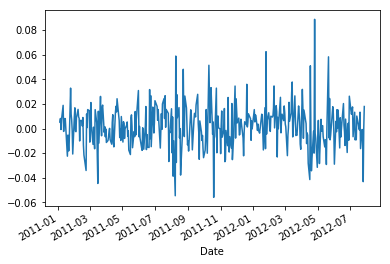

In [44]:
returns.plot()

In [46]:
ret_index = (returns+1).cumprod()

In [47]:
ret_index[0] = 1

In [48]:
ret_index

Date
2011-01-03    1.000000
2011-01-04    1.005219
2011-01-05    1.013442
2011-01-06    1.012622
2011-01-07    1.019874
2011-01-10    1.039081
2011-01-11    1.036623
2011-01-12    1.045059
2011-01-13    1.048882
2011-01-14    1.057378
2011-01-18    1.033619
2011-01-19    1.028128
2011-01-20    1.009436
2011-01-21    0.991352
2011-01-24    1.023910
2011-01-25    1.035895
2011-01-26    1.043329
2011-01-27    1.041387
2011-01-28    1.019813
2011-01-31    1.029584
2011-02-01    1.046909
2011-02-02    1.044755
2011-02-03    1.042085
2011-02-04    1.051370
2011-02-07    1.067694
2011-02-08    1.077768
2011-02-09    1.086749
2011-02-10    1.075765
2011-02-11    1.082774
2011-02-14    1.089844
                ...   
2012-06-15    1.742057
2012-06-18    1.777407
2012-06-19    1.782353
2012-06-20    1.777285
2012-06-21    1.752799
2012-06-22    1.766241
2012-06-25    1.731862
2012-06-26    1.735686
2012-06-27    1.743180
2012-06-28    1.726643
2012-06-29    1.772005
2012-07-02    1.797857
2012-0

In [49]:
ret_index_t = price/31.749659

In [54]:
pd.concat([ret_index,ret_index_t],axis=1)

,Adj Close,Adj Close
Date,,
2011-01-03,1.000000,1.000000
2011-01-04,1.005219,1.005219
2011-01-05,1.013442,1.013442
2011-01-06,1.012622,1.012622
2011-01-07,1.019874,1.019874
2011-01-10,1.039081,1.039081
2011-01-11,1.036623,1.036623
2011-01-12,1.045059,1.045059
2011-01-13,1.048882,1.048882


In [67]:
import random;random.seed(0)
import string

In [68]:
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

In [69]:
tickers

array(['MYNBI', 'QPMZJ', 'PLSGQ', 'EJEYD', 'TZIRW', 'ZTEJD', 'XCVKP',
       'RDLNK', 'TUGRP', 'OQIBZ', 'RACXM', 'WZVUA', 'TPKHX', 'KWCGS',
       'HHZEZ', 'ROCCK', 'QPDJR', 'JWDRK', 'RGZTR', 'SJOCT', 'ZMKSH',
       'JFGFB', 'TVIPC', 'CVYEE', 'BCWRV', 'MWQIQ', 'ZHGVS', 'NSIOP',
       'VUWZL', 'CKTDP', 'SUKGH', 'AXIDW', 'HLZFK', 'NBDZE', 'WHBSU',
       'RTVCA', 'DUGTS', 'DMCLD', 'BTAGF', 'WDPGX', 'ZBVAR', 'NTDIC',
       'HCUJL', 'NFBQO', 'BTDWM', 'GILXP', 'SFWVG', 'YBZVF', 'FKQID',
       'TOVFA', 'PVNSQ', 'JULMV', 'IERWA', 'OXCKX', 'BRIEH', 'YPLTJ',
       'VLSUT', 'EWJMX', 'NUCAT', 'GWKFH', 'HUOMW', 'VSNBM', 'WSNYV',
       'WBFOC', 'IWFOQ', 'PRTYA', 'BPKJO', 'BZZNG', 'RUCXE', 'AMVNK',
       'AGAWY', 'AVQTD', 'GDTUG', 'JIWFD', 'PMUCA', 'IOZZD', 'IEUQU',
       'ULDEI', 'ABBGV', 'IRKLS', 'BXWTU', 'PWUOU', 'NLRFG', 'MSJAE',
       'EIKKZ', 'LWCKY', 'TBBIF', 'ESJLM', 'REJDP', 'XHBJF', 'QXCJM',
       'KJNDD', 'RPPKZ', 'ZKDPD', 'WPNBJ', 'KXVEF', 'USMZU', 'CCZCG',
       'XHBMA', 'DMR

In [71]:
M = 500
df = DataFrame({'Momentum':np.random.randn(M)/200+0.03,
               'value':np.random.randn(M)/200+0.08,
               'shortinterest':np.random.randn(M)/200-0.02},
              index=tickers[:500])

In [72]:
df

,Momentum,value,shortinterest
MYNBI,0.027718,0.081220,-0.024392
QPMZJ,0.031285,0.082435,-0.022455
PLSGQ,0.027666,0.076973,-0.016696
EJEYD,0.036235,0.076904,-0.023439
TZIRW,0.030225,0.076831,-0.016542
ZTEJD,0.027530,0.069029,-0.021427
XCVKP,0.027008,0.081054,-0.019284
RDLNK,0.027702,0.079035,-0.022721
TUGRP,0.026589,0.077916,-0.027735
OQIBZ,0.033103,0.077408,-0.007038


In [75]:
ind_names = np.array(['financial','tech'])
sampler = np.random.randint(0,2,N)
industries = Series(ind_names[sampler],index=tickers,name='industry')

In [76]:
industries

MYNBI    financial
QPMZJ         tech
PLSGQ         tech
EJEYD    financial
TZIRW         tech
ZTEJD         tech
XCVKP    financial
RDLNK         tech
TUGRP    financial
OQIBZ         tech
RACXM    financial
WZVUA         tech
TPKHX         tech
KWCGS         tech
HHZEZ         tech
ROCCK    financial
QPDJR         tech
JWDRK    financial
RGZTR         tech
SJOCT    financial
ZMKSH         tech
JFGFB         tech
TVIPC    financial
CVYEE    financial
BCWRV    financial
MWQIQ    financial
ZHGVS    financial
NSIOP    financial
VUWZL    financial
CKTDP    financial
           ...    
XWPSF         tech
ZSYAT         tech
LGJNC         tech
HDFZT         tech
OUEPK         tech
OWEPZ    financial
IPKWQ    financial
XZHYB    financial
LQIMR         tech
UTDJE    financial
QEECK         tech
GBAPP         tech
CSQBE    financial
UOSES    financial
ICJLE    financial
OLBKD         tech
DTVDJ    financial
VJSLF         tech
YAVYP    financial
MMUGC         tech
NIPNV         tech
PMENZ       

In [77]:
by_industry = df.groupby(industries)

In [78]:
by_industry.mean()

,Momentum,value,shortinterest
industry,,,
financial,0.029884,0.080044,-0.020604
tech,0.029755,0.080051,-0.020106


In [80]:
by_industry.describe().T

industry              financial        tech
Momentum      count  245.000000  255.000000
              mean     0.029884    0.029755
              std      0.004998    0.004668
              min      0.016188    0.014688
              25%      0.026589    0.026787
              50%      0.029935    0.030044
              75%      0.032767    0.032751
              max      0.044934    0.043160
value         count  245.000000  255.000000
              mean     0.080044    0.080051
              std      0.004812    0.005164
              min      0.068731    0.065273
              25%      0.076879    0.076784
              50%      0.080137    0.080353
              75%      0.083347    0.083137
              max      0.090792    0.100522
shortinterest count  245.000000  255.000000
              mean    -0.020604   -0.020106
              std      0.004917    0.004918
              min     -0.033524   -0.032319
              25%     -0.023787   -0.022966
              50%     -0.020651   -0.020230
              75%     -0.017168   -0.016898
              max     -0.007377   -0.004982

In [82]:
fac1,fac2,fac3 = np.random.rand(3,1000)

In [85]:
np.random.rand(3,1000)

array([[0.77127355, 0.70596952, 0.42103611, ..., 0.78989174, 0.49153965,
        0.9112499 ],
       [0.04313717, 0.54237721, 0.95212825, ..., 0.2553915 , 0.17882981,
        0.44553791],
       [0.3995786 , 0.63274103, 0.54025941, ..., 0.32086767, 0.80479721,
        0.2644379 ]])

In [86]:
ticker_subset = tickers.take(np.random.permutation(N)[:1000])

In [90]:
ticker_subset[:10]

array(['NSIOP', 'AVAXF', 'ONVNA', 'JKUUT', 'YCCLG', 'VSWYJ', 'KXVEF',
       'CNBOL', 'RXREF', 'AZQWM'], dtype='<U5')

In [88]:
port = Series(0.7*fac1-1.2*fac2+0.3*fac3+np.random.rand(1000),
             index=ticker_subset)

In [91]:
port[:10]

NSIOP   -0.357781
AVAXF    0.592948
ONVNA    0.164298
JKUUT    1.284680
YCCLG   -0.309576
VSWYJ    0.134187
KXVEF    0.391346
CNBOL    0.880932
RXREF    1.188387
AZQWM    0.080591
dtype: float64

In [93]:
factors = DataFrame({'f1':fac1,'f2':fac2,'f3':fac3},index=ticker_subset)

In [95]:
factors[:10]

,f1,f2,f3
NSIOP,0.138856,0.819023,0.812335
AVAXF,0.305590,0.658042,0.729561
ONVNA,0.269285,0.198222,0.284531
JKUUT,0.324053,0.118139,0.898522
YCCLG,0.478109,0.950827,0.667199
VSWYJ,0.607261,0.710202,0.300581
KXVEF,0.261712,0.117686,0.706927
CNBOL,0.373594,0.060511,0.075870
RXREF,0.501879,0.096281,0.504692
AZQWM,0.318144,0.756436,0.085096


In [96]:
factors.corrwith(port)

f1    0.378870
f2   -0.694394
f3    0.154884
dtype: float64

In [100]:
import statsmodels.api as sm
sm.OLS(port,factors).fit().params

f1    1.006121
f2   -0.894947
f3    0.587614
dtype: float64